## Problem Statement:
## "To predict water quality based on various chemical and physical parameters using machine learning models.

## Why this dataset? 
It contains real-world water quality indicators like pH, solids, conductivity, etc.
It includes both features and target, making it suitable for supervised learning.
It helps in building a model to predict water safety, which is important for public health and environmental monitoring

 ## Water Potability Prediction - Machine Learning Model

 * Water Potability refers to the safety of water for human consumption.
 * Potable Water is free from harmful contaminants and bacteria and is safe for during and food preparation.
 * The World Health Organization considers access to safe drinking water a basic human right.
 * There are various methods to ensure water potability.including filtration and treatment Process such as UV filtration and reverse osmosis.
 * In developed countries.tap water meets drinking water quantity standards.although only a small proportion is actually consumed or used in food      preparation.
 * If you are concerned about the potability of your water, you can have it tested by a professional laboratory.
 * A water potability is a crucial evaluation of water quality that determines its suitability for human consumption.

In [1]:
import numpy as np      # Numerical operations and array handling 
import pandas as pd     # Data manipulation and analysis
import seaborn as sns   # Statistical data visualization 
import matplotlib.pyplot as plt # Data visualization and plotting
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [11]:
# summary of the dataFrame structure.
df.info() # total rows = 3276
# total cols = 10
# missing cols = ph,sulfate,Trihalomethanes 
# handle the missing values and not object datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df.describe() # this is the normal distribution 
# solids clos are mean>median so +ve skwed cols 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
df.duplicated().any() # check the duplicated value in dataframe 

False

In [14]:
df.isnull().sum() # check the null values in dataframe for every columns
# there are three cols are null values 
# cols name = ph = 491, Sulfate = 781,  Trihalomethanes = 162

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [19]:
df.isnull().sum()/len(df)*100 # check the percentage of null values in every columns 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [35]:
total_null = df.isnull().sum().sum() # check the overall dataset total percentage null values here are 4 % 
total_cells = df.shape[0] * df.shape[1]
null_percentage = (total_null / total_cells)*100
print(f" Total null percentage :{null_percentage:.2f}%")

 Total null percentage :4.38%


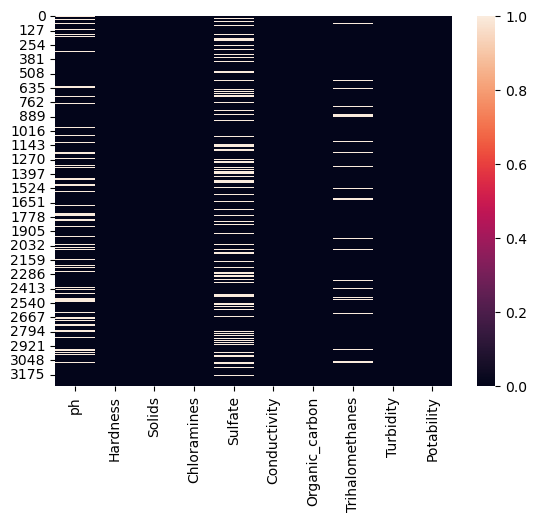

In [16]:
sns.heatmap(df.isnull()) # this heatmap show is the white line is the null values columns show and black colour show is the not null values columns
plt.show() 

## Handling Missing values

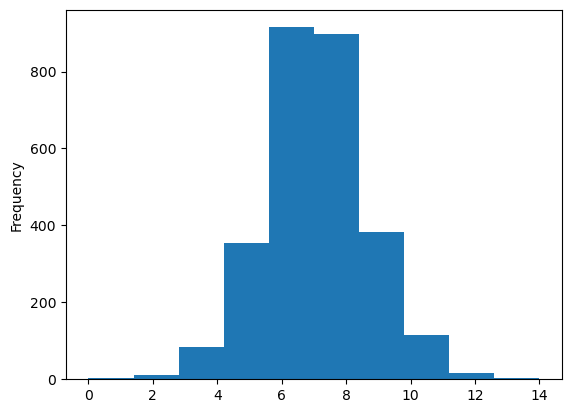

In [18]:
# Handle the missing values
# Most of the ph values lie between 6 to 8 normal range
# ph value below 4 or above 10 very less so which could be outliers
df["ph"].plot(kind="hist") # the data is normaly distributed
plt.show()

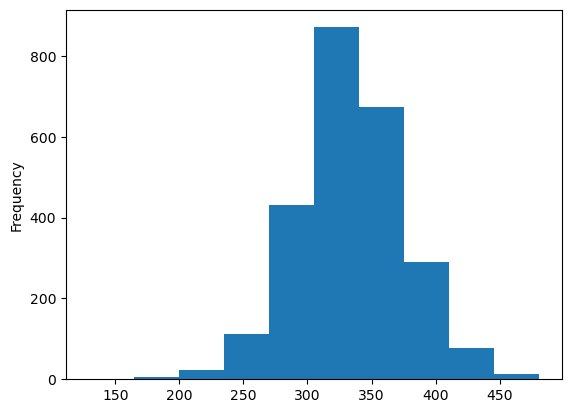

In [19]:
df["Sulfate"].plot(kind="hist")
plt.show()

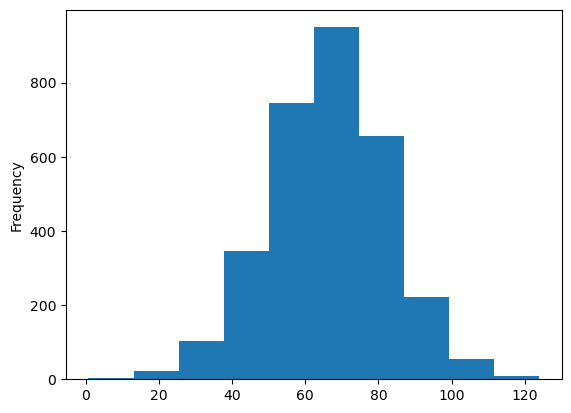

In [20]:
df["Trihalomethanes"].plot(kind="hist")
plt.show()

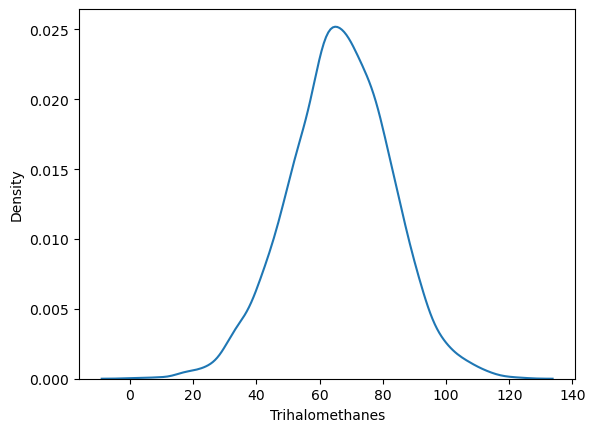

In [21]:
sns.kdeplot(data=df,x="Trihalomethanes") # its normal distribution 
plt.show()

In [22]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [23]:
# here is continuous cols 
# so i fill the null values by mean()
df["ph"]=df["ph"].fillna(df["ph"].mean())
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean())

In [24]:
df.isnull().sum() # check the null values after the fill 
# so here is not null values present.

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

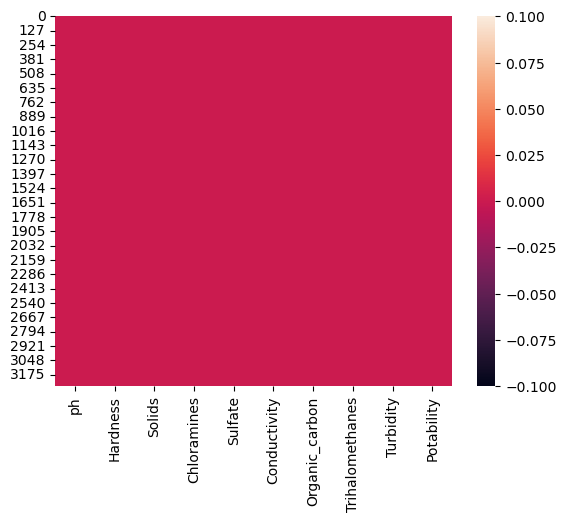

In [25]:
sns.heatmap(df.isnull())
plt.show() # checking the plot 

## Checking Correlation

In [27]:
# checking the corr in the dataset
corr_metrix = df.corr()
corr_metrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


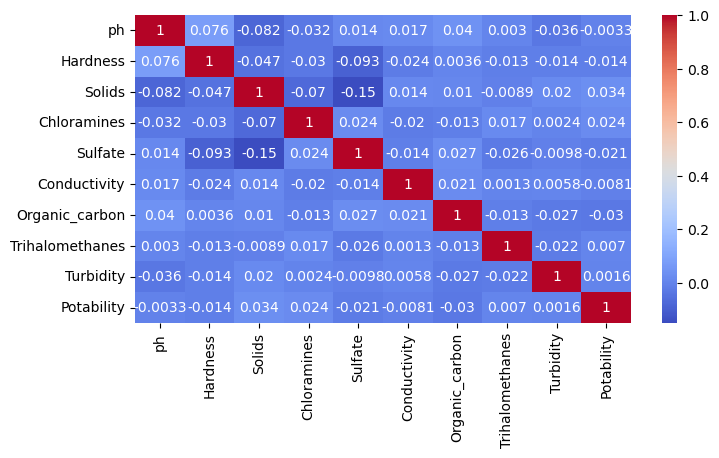

In [28]:
# It Visualizes the linear relationship between variable
# solids and conductivity very strongly related 
# +1 stronge positive correlation 
# -1 strong negative correlation 
# 0 no correlation 
plt.figure(figsize=(8,4))
sns.heatmap(corr_metrix,annot=True,cmap="coolwarm")
plt.show()

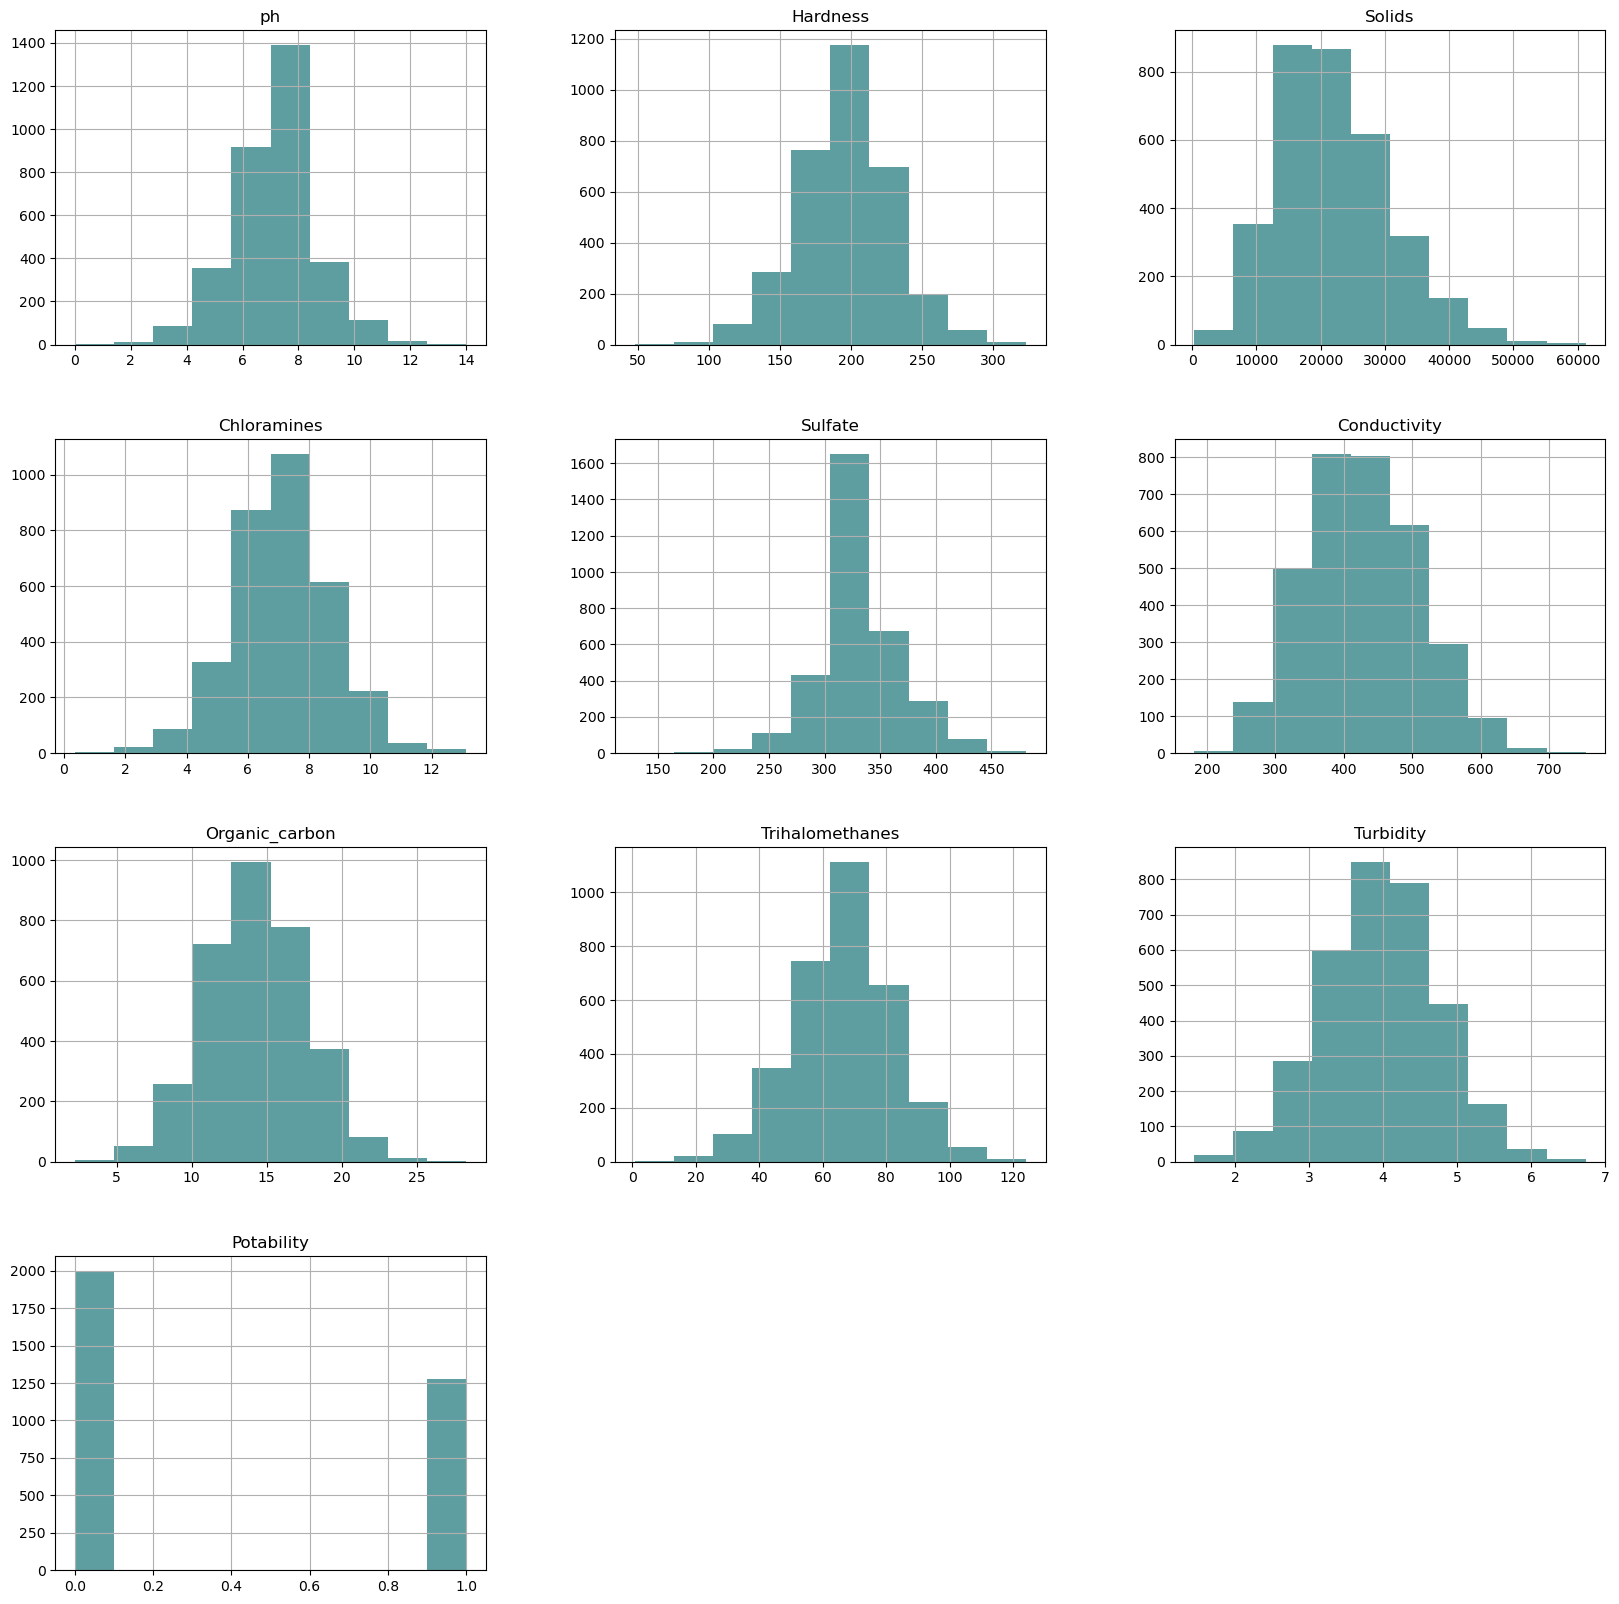

In [29]:
data_hist_plot = df.hist(figsize=(20,20),color="#5F9EA0") # I checked the distribution of all the columns

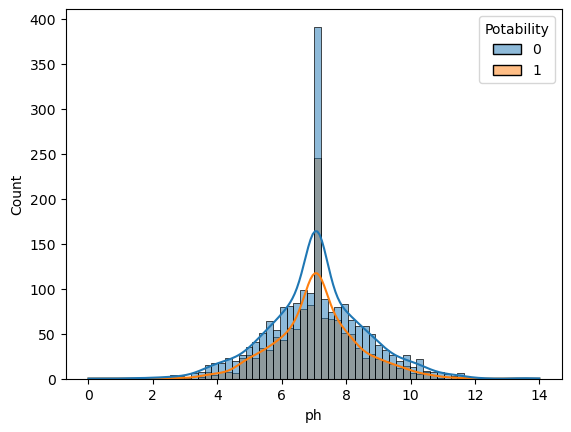

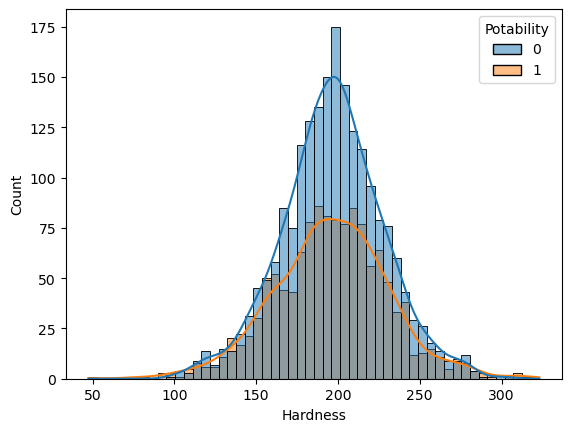

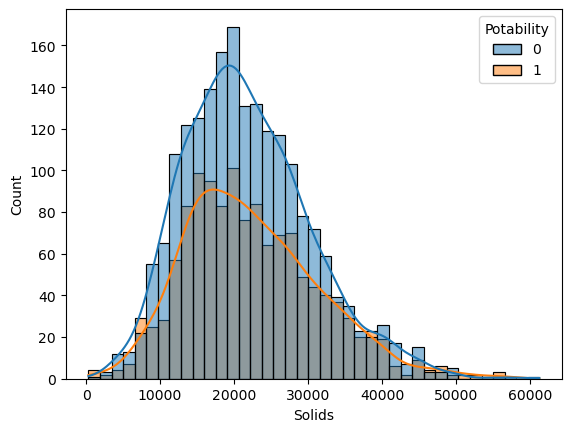

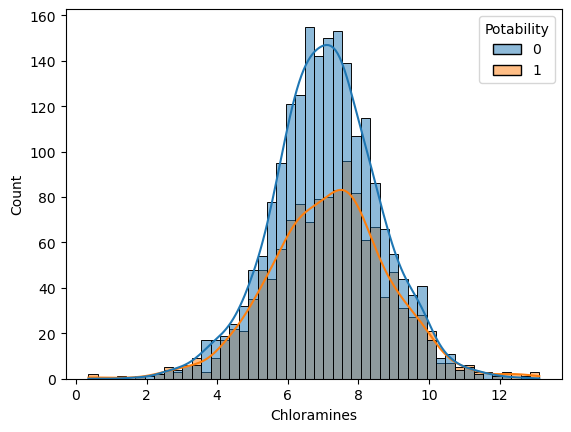

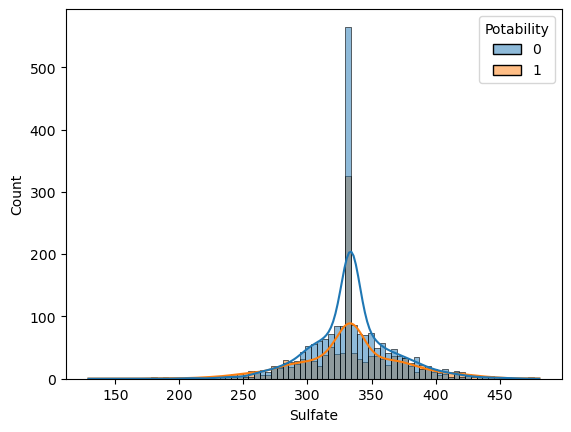

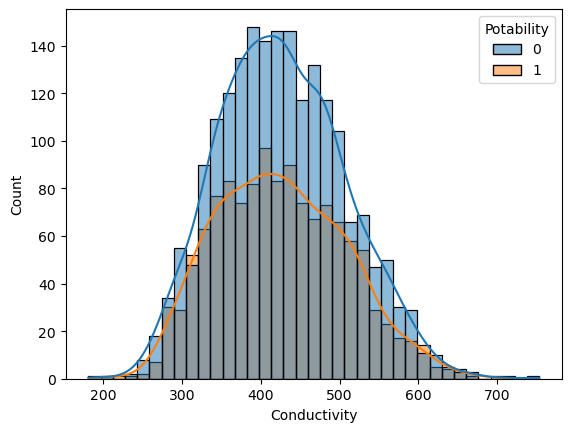

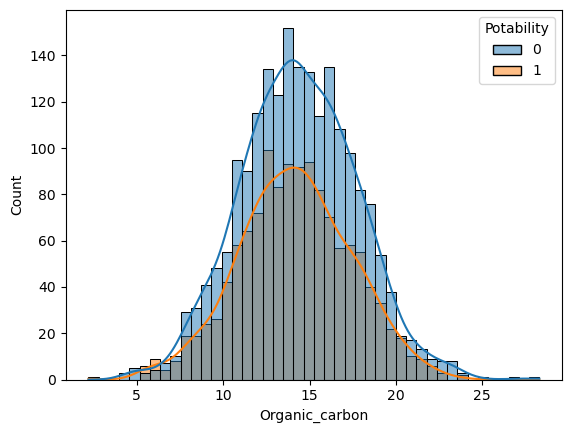

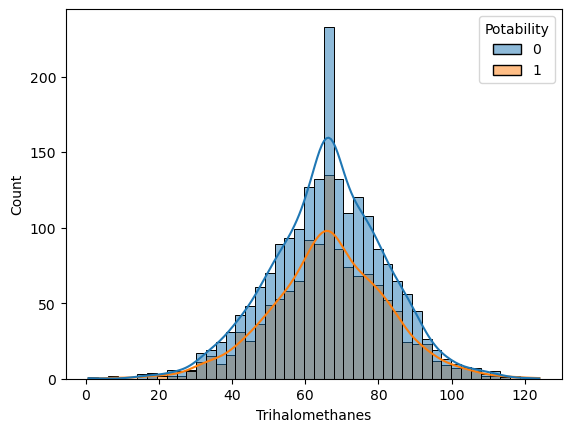

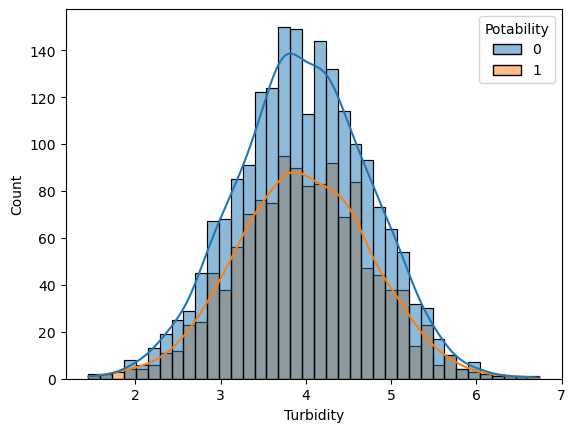

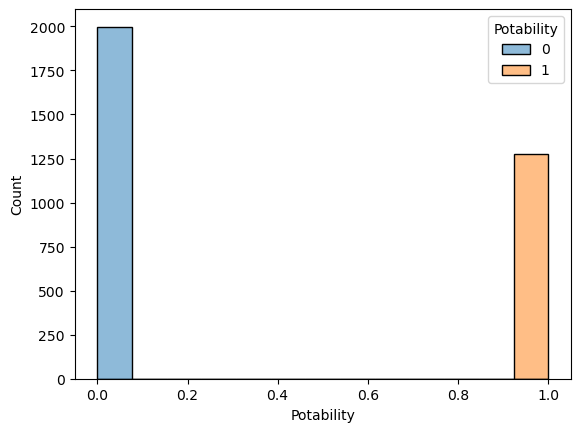

In [30]:
# the difference b/w safe and unsafe water
# blue color is the unsafe and orange color is safe water
for col in df.columns:
    sns.histplot(data=df,x=col,kde=True,hue="Potability")
    plt.show()

In [31]:
df.groupby("Potability").mean().T # the dataset is groped by potability columns potability = 0 (unsafe water) 
# potability = 1 (safe water)
# average values all numerical features within each group

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


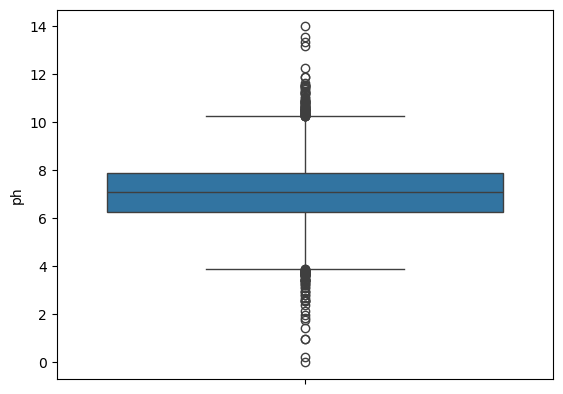

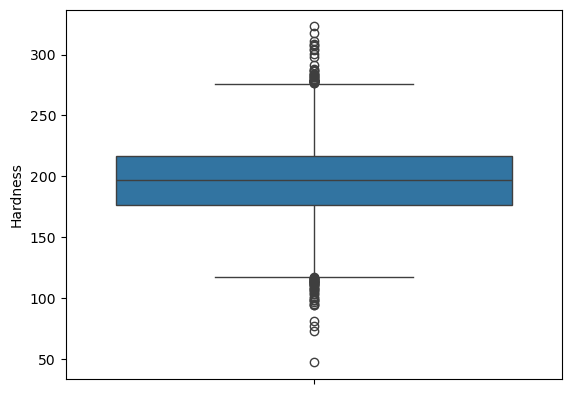

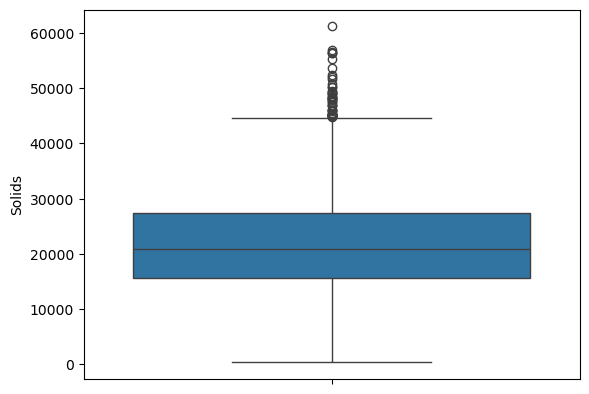

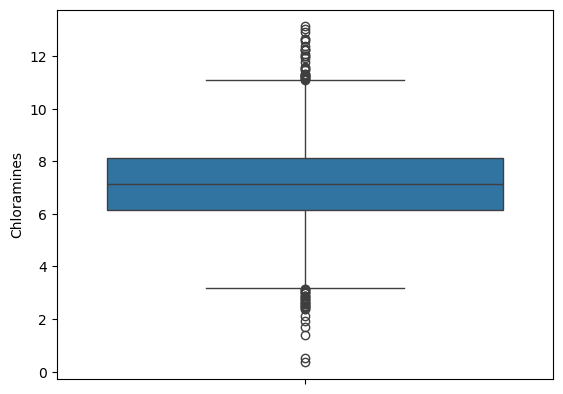

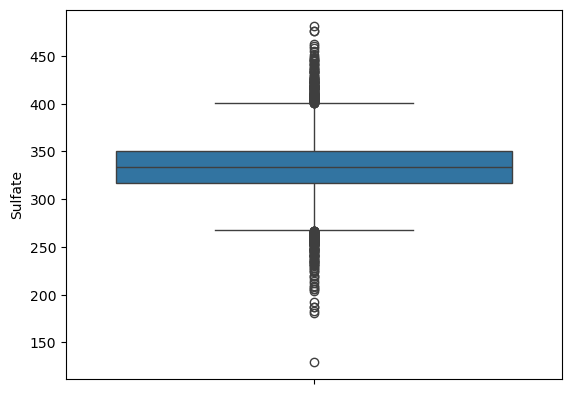

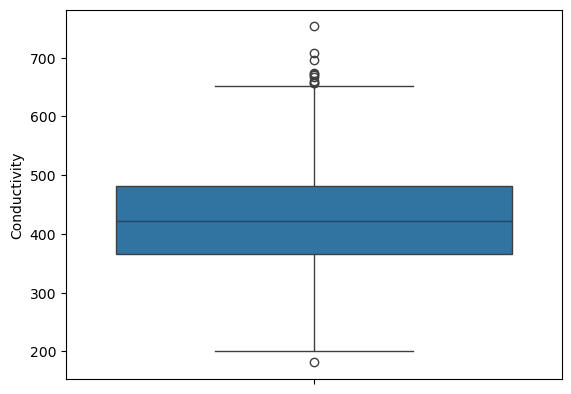

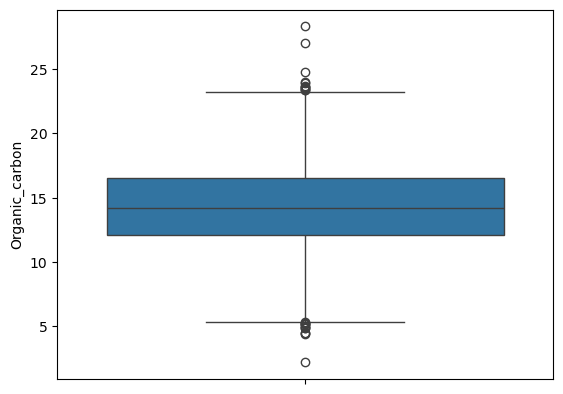

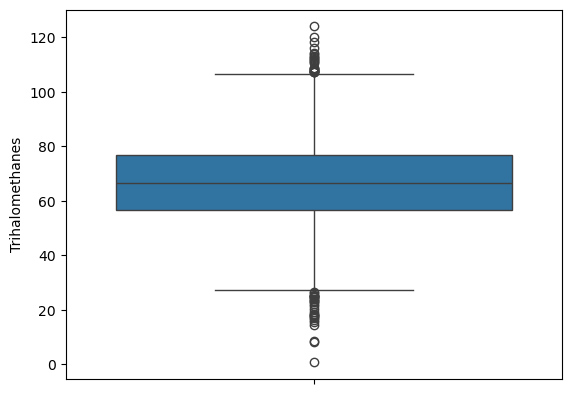

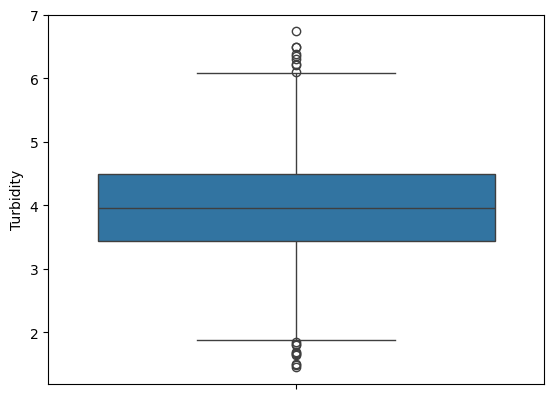

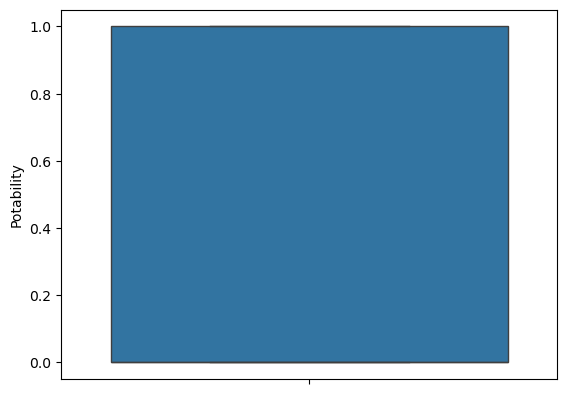

'circles are outliers\nupper whisker\ninside box  quartile 1 2 3 (q2 also called as median no mean)\nlower whisker'

In [32]:
for col in df.columns: # checking the outlier for each columns in dataframe by loop 
    sns.boxplot(data=df,y=col) # show the box plot 
    plt.show() 

'''circles are outliers
upper whisker
inside box  quartile 1 2 3 (q2 also called as median no mean)
lower whisker'''

<Axes: xlabel='Potability'>

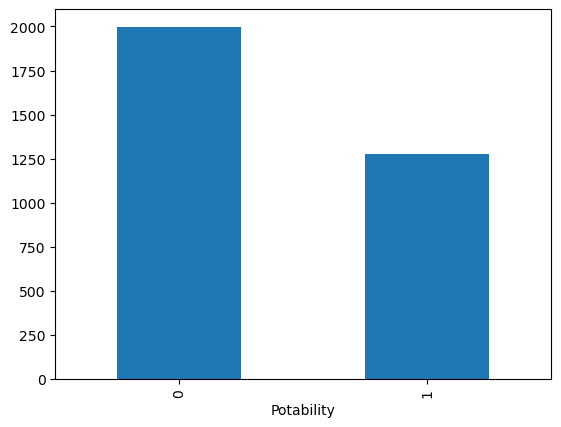

In [33]:
df["Potability"].value_counts().plot(kind="bar")  # 0 = (unsafe water) , 1 = (safe water)

## Data Preprocessing 

In [35]:
x = df.drop(["Potability"],axis=1) # X contains all features except "Potability".
y = df["Potability"] # y contains only the "Potability" column, which is the label for classification

In [36]:
x.head() 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

# Feature Scalling

In [39]:
from sklearn.preprocessing import StandardScaler 
std_scaled = StandardScaler()

In [40]:
x_scaled = std_scaled.fit_transform(x)
x_scaled # 0 mean values and 1 standard deviation

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

## Training and Testing Dataset

In [42]:
from sklearn.model_selection import train_test_split # Machine learning utilities for train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42,stratify=y) # stratify for imbalaced target

In [43]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

## Model Development:
* List of Models
      1. LogisticRegression
      2. DecisionTreeClassifier
      3. RandomForestClassifier
      4. Support Vector Classifier
      5. KNeighborsClassifier
      6. GrandientBoostingClassifier
      7. Naive-Bayes
      8. AdaBoostClassifier

## Importing models

In [53]:
# import the libarary 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

## Creating the object of the model:

In [56]:
# create the object
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
SVM =  SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
NB = GaussianNB()

In [58]:
from sklearn.model_selection import cross_val_score

In [60]:
models = [LR, DT, RF, SVM, KNN, GBC, ABC, NB]
features = x_scaled
labels = y
CV = 5
accu_list = [] # Accuracy list
ModelName = []# Model Name List
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,features,labels, scoring = "accuracy",cv=CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)
model_acc_df = pd.DataFrame({"Model":ModelName, "Cross_Val_Accuracy": accu_list})
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.509728
2,RandomForestClassifier,64.011730
3,SVC,65.080339
4,KNeighborsClassifier,59.340579
5,GradientBoostingClassifier,62.088717
6,AdaBoostClassifier,61.019177
7,GaussianNB,61.263871


In [61]:
from sklearn.metrics import classification_report

In [69]:
SVM.fit(x_train, y_train)
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)
y_pred_svm = SVM.predict(x_test)

In [71]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75       400
           1       0.61      0.29      0.39       256

    accuracy                           0.65       656
   macro avg       0.63      0.58      0.57       656
weighted avg       0.64      0.65      0.61       656



In [77]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       400
           1       0.69      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656



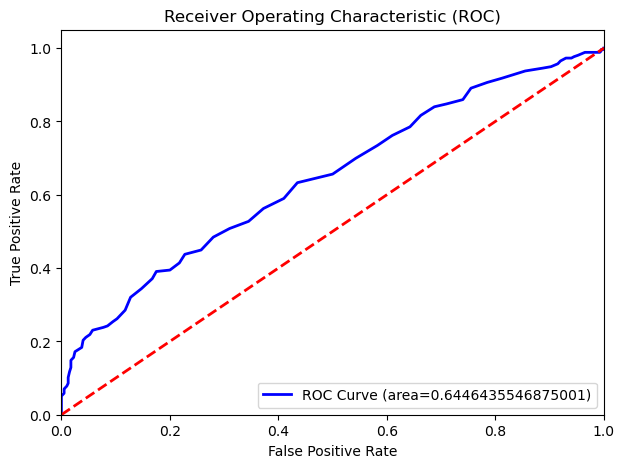

In [79]:
from sklearn.metrics import roc_curve, auc
y_scores = RF.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (area={roc_auc})")
plt.plot([0,1],[0,1],color="red",lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")       # Blue line is the actual Roc curve Red Dashed line baseline
plt.show()

## Best Model- Random Forest

In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hyperparameter tunning
from sklearn.model_selection import StratifiedKFold

params_RF = {"min_samples_split":[2, 6],
             "min_samples_leaf":[1, 4],
             "n_estimators":[100, 200, 300],
             "criterion":["gini","entorpy"]
            }

cv_method = StratifiedKFold(n_splits=3)
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                             param_grid=params_RF,
                             cv=cv_method,
                             verbose=1,
                             n_jobs=2,
                             scoring="accuracy",
                             return_train_score=True)
GridSearchCV_RF.fit(x_train, y_train)
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are = ",best_params_RF)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are =  {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 200}


In [83]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(x_train, y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.68      0.30      0.42       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656



In [88]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of Random Forest Model = {round(accuracy_score(y_test, y_pred_best)*100,2)}%")

Accuracy of Random Forest Model = 67.07%


## Predictive System:

In [91]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [93]:
list1 = df.iloc[2:3,0:9].values.flatten().tolist()
list1

[8.099124189,
 224.2362594,
 19909.54173,
 9.275883603,
 333.775776610501,
 418.6062131,
 16.86863693,
 66.42009251,
 3.05593375]

In [97]:
# user input
ph = float(input("Enter the ph Value = "))
Hardness = float(input("Enter the Hardness value = "))
Solids = float(input("Enter the Solids Value ="))
Chloramines = float(input("Enter the Chloramines Value = "))
Sulfate = float(input("Enter the Sulfate Value ="))
Conductivity = float(input("Enter the Conductivity Value ="))
Organic_carbon = float(input("Enter the Organic_carbon Value = "))
Trihalomethanes = float(input("Entet the Trihalomethanes values ="))
Turbidity = float(input("Enter the Trubidity Value ="))

Enter the ph Value =  8.0
Enter the Hardness value =  224.0
Enter the Solids Value = 19900
Enter the Chloramines Value =  9.2
Enter the Sulfate Value = 333.77
Enter the Conductivity Value = 418.2
Enter the Organic_carbon Value =  16
Entet the Trihalomethanes values = 66.42
Enter the Trubidity Value = 3.05


In [99]:
input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]

In [101]:
water_data_input = std_scaled.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]])
water_data_input

array([[ 6.25424054e-01,  8.40478179e-01, -2.41135677e-01,
         1.31265253e+00, -1.59852651e-04, -9.90587746e-02,
         5.18502894e-01,  1.50354160e-03, -1.17497027e+00]])

In [103]:
model_prediction = best_estimator.predict(water_data_input)
model_prediction

array([0], dtype=int64)

In [105]:
if model_prediction[0]==0:
    print("Water is Not SAFE for Consumption")
else:
    print("Water is SAFE for Consumption")

Water is Not SAFE for Consumption


In [107]:
def water_Quality_Prediction(input_data):
    scaled_data = std_scaled.transform([input_data])
    model_prediction = best_estimator.predict(scaled_data)
    if model_prediction[0]==0:
        return "Water is 'Not SAFE' for Consumption"
    else:
        return "Water is 'SAFE' for Consumption"

In [109]:
ph = float(input("Enter the ph Value = "))
Hardness = float(input("Enter the Hardness value = "))
Solids = float(input("Enter the Solids Value ="))
Chloramines = float(input("Enter the Chloramines Value = "))
Sulfate = float(input("Enter the Sulfate Value ="))
Conductivity = float(input("Enter the Conductivity Value ="))
Organic_carbon = float(input("Enter the Organic_carbon Value = "))
Trihalomethanes = float(input("Entet the Trihalomethanes values ="))
Turbidity = float(input("Enter the Trubidity Value ="))

input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity]
water_Quality_Prediction(input_data)

Enter the ph Value =  5.6
Enter the Hardness value =  220
Enter the Solids Value = 1200
Enter the Chloramines Value =  12000
Enter the Sulfate Value = 7.5
Enter the Conductivity Value = 310
Enter the Organic_carbon Value =  350
Entet the Trihalomethanes values = 12.5
Enter the Trubidity Value = 60.1


"Water is 'SAFE' for Consumption"

## Save Trained Model:

In [ ]:
import pickle # 

In [ ]:
filename = "water_Quality_ML_Trained_Model.sav"
pickle.dump(best_estimator, open(filename,"wb"))

## Load Trained Model:

In [ ]:
water_Quality_model = pickle.load(open("water_Quality_ML_Trained_Model.sav","rb"))

In [ ]:
data = [5.6, 220, 12000, 7.5, 310, 350, 12.5, 60.2, 2.5]
scaled_data = std_scaled.transform([data])
water_Quality_model.predict(scaled_data)

In [ ]:
data1 = [7.65, 236.96, 14245.78, 6.28, 373.16, 416.62, 10.46, 85.85, 2.43]
scaled_data1 = std_scaled.transform([data1])
water_Quality_model.predict(scaled_data1)